# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
def transform(x):
    if x == 0.0:
        return 'mulher'
    else:
        return 'homem'
    
def analise():
    # # Dummies de doentes e saudaveis
    df_analise = pd.get_dummies(df,columns=['flag_doente'])
    # Renomear as dummies
    df_analise = df_analise.rename(columns ={'flag_doente_0':'saudavel','flag_doente_1':'doente'})
    # Nomear os nomes do atributo sexo
    df_analise['sex'] = df_analise['sex'].apply(lambda x: transform(x)) 
    display(df_analise.head())
    return df_analise

def agrupamento(data):
    dt = data.copy()
    # Bivariada com base no sexo para pacientes saudaveis e doentes.
    dt = dt.groupby('sex')[['saudavel','doente']].sum()
    # Total de casos
    dt['Total'] = dt.sum(1)
    # Média dos doentes
    dt[['media_saudavel','media_doente']] =  data.groupby('sex')[['saudavel','doente']].mean()
    # ODDs
    dt['chance'] = dt['saudavel'] / dt['doente']
    # Taxa de ODDs
    dt['taxa_chance'] = dt['Total'] / dt['chance']
    # Logito
    dt['log_chance'] = np.log(dt['chance'])
    # Weight of Evidence
    dt['WOE'] = np.log(dt['taxa_chance'])
    
    return dt

In [5]:
df_analise = analise()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,saudavel,doente
0,63.0,homem,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,True,False
1,67.0,homem,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,False,True
2,67.0,homem,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,False,True
3,37.0,homem,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,True,False
4,41.0,mulher,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,True,False


In [6]:
agrupamento(df_analise)

,saudavel,doente,Total,media_saudavel,media_doente,chance,taxa_chance,log_chance,WOE
sex,,,,,,,,,
homem,92,114,206,0.446602,0.553398,0.807018,255.260870,-0.21441,5.542286
mulher,72,25,97,0.742268,0.257732,2.880000,33.680556,1.05779,3.516921


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [134]:
def bivariada_age(data):
    dt = data.copy()
    dat = data.copy()
    dt['cut_age'] = pd.qcut(dt['age'], q=5).astype(str)
    dat['cut_age'] = dt['cut_age'].copy()
    
    
    dt = dt.groupby('cut_age')[['saudavel','doente']].sum()
    # Total de casos
    dt['Total'] = dt.sum(1)
    # Média dos doentes
    dt[['media_saudavel','media_doente']] =  dat.groupby('cut_age')[['saudavel','doente']].mean()
    # ODDs para pessoa ficar doente.
    dt['chance'] = dt['doente'] /dt['saudavel'] 
    # Taxa de ODDs
    dt['taxa_chance'] = dt['Total'] / dt['chance']
    # Logito
    dt['log_chance'] = np.log(dt['chance'])
    # Weight of Evidence
    dt['WOE'] = np.log(dt['taxa_chance'])
    # Média de idade
    dt['media'] = dat.groupby('cut_age')['age'].mean()
    return dt
    

In [135]:
bivariada_age(df_analise)

,saudavel,doente,Total,media_saudavel,media_doente,chance,taxa_chance,log_chance,WOE,media
cut_age,,,,,,,,,,
"(28.999, 45.0]",47,16,63,0.746032,0.253968,0.340426,185.062500,-1.077559,5.220694,41.222222
"(45.0, 53.0]",42,22,64,0.656250,0.343750,0.523810,122.181818,-0.646627,4.805510,50.000000
"(53.0, 58.0]",32,39,71,0.450704,0.549296,1.218750,58.256410,0.197826,4.064854,56.211268
"(58.0, 62.0]",13,32,45,0.288889,0.711111,2.461538,18.281250,0.900787,2.905876,60.355556
"(62.0, 77.0]",30,30,60,0.500000,0.500000,1.000000,60.000000,0.000000,4.094345,66.516667


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

In [145]:
def grafico_infos():
    dt = (bivariada_age(df_analise)
         .reset_index())
    #sns.despine()
    df_an = pd.melt(dt, id_vars='cut_age',value_vars=['saudavel','doente'])
    figura = plt.figure(figsize=(15,30))
    plt.suptitle("Análise gráfica.", fontsize=30)
    plt.subplots_adjust(top=0.94,
                        hspace = 0.5)
    tamanho = (6,1)
    pos = (0,0)
    with sns.axes_style("darkgrid"):
        ax = plt.subplot2grid(tamanho, pos)
    
    fig = sns.barplot(data=df_an, y='value',x='cut_age', hue='variable', ax=ax)
    fig.set_title('Relação entre Doentes e Saudaveis para faixa de idade',fontsize=20)
    
    lista = ['chance','taxa_chance','log_chance','WOE','media_doente']
    
    for i in range(5):
        
        pos = (i+1,0)
        with sns.axes_style("darkgrid"):
            ax = plt.subplot2grid(tamanho, pos)
        
        fig = sns.lineplot(data=dt, y=lista[i], x='cut_age',ax=ax)
        fig.set_title(f'Relação entre {lista[i]} para faixa de idade',fontsize=20)

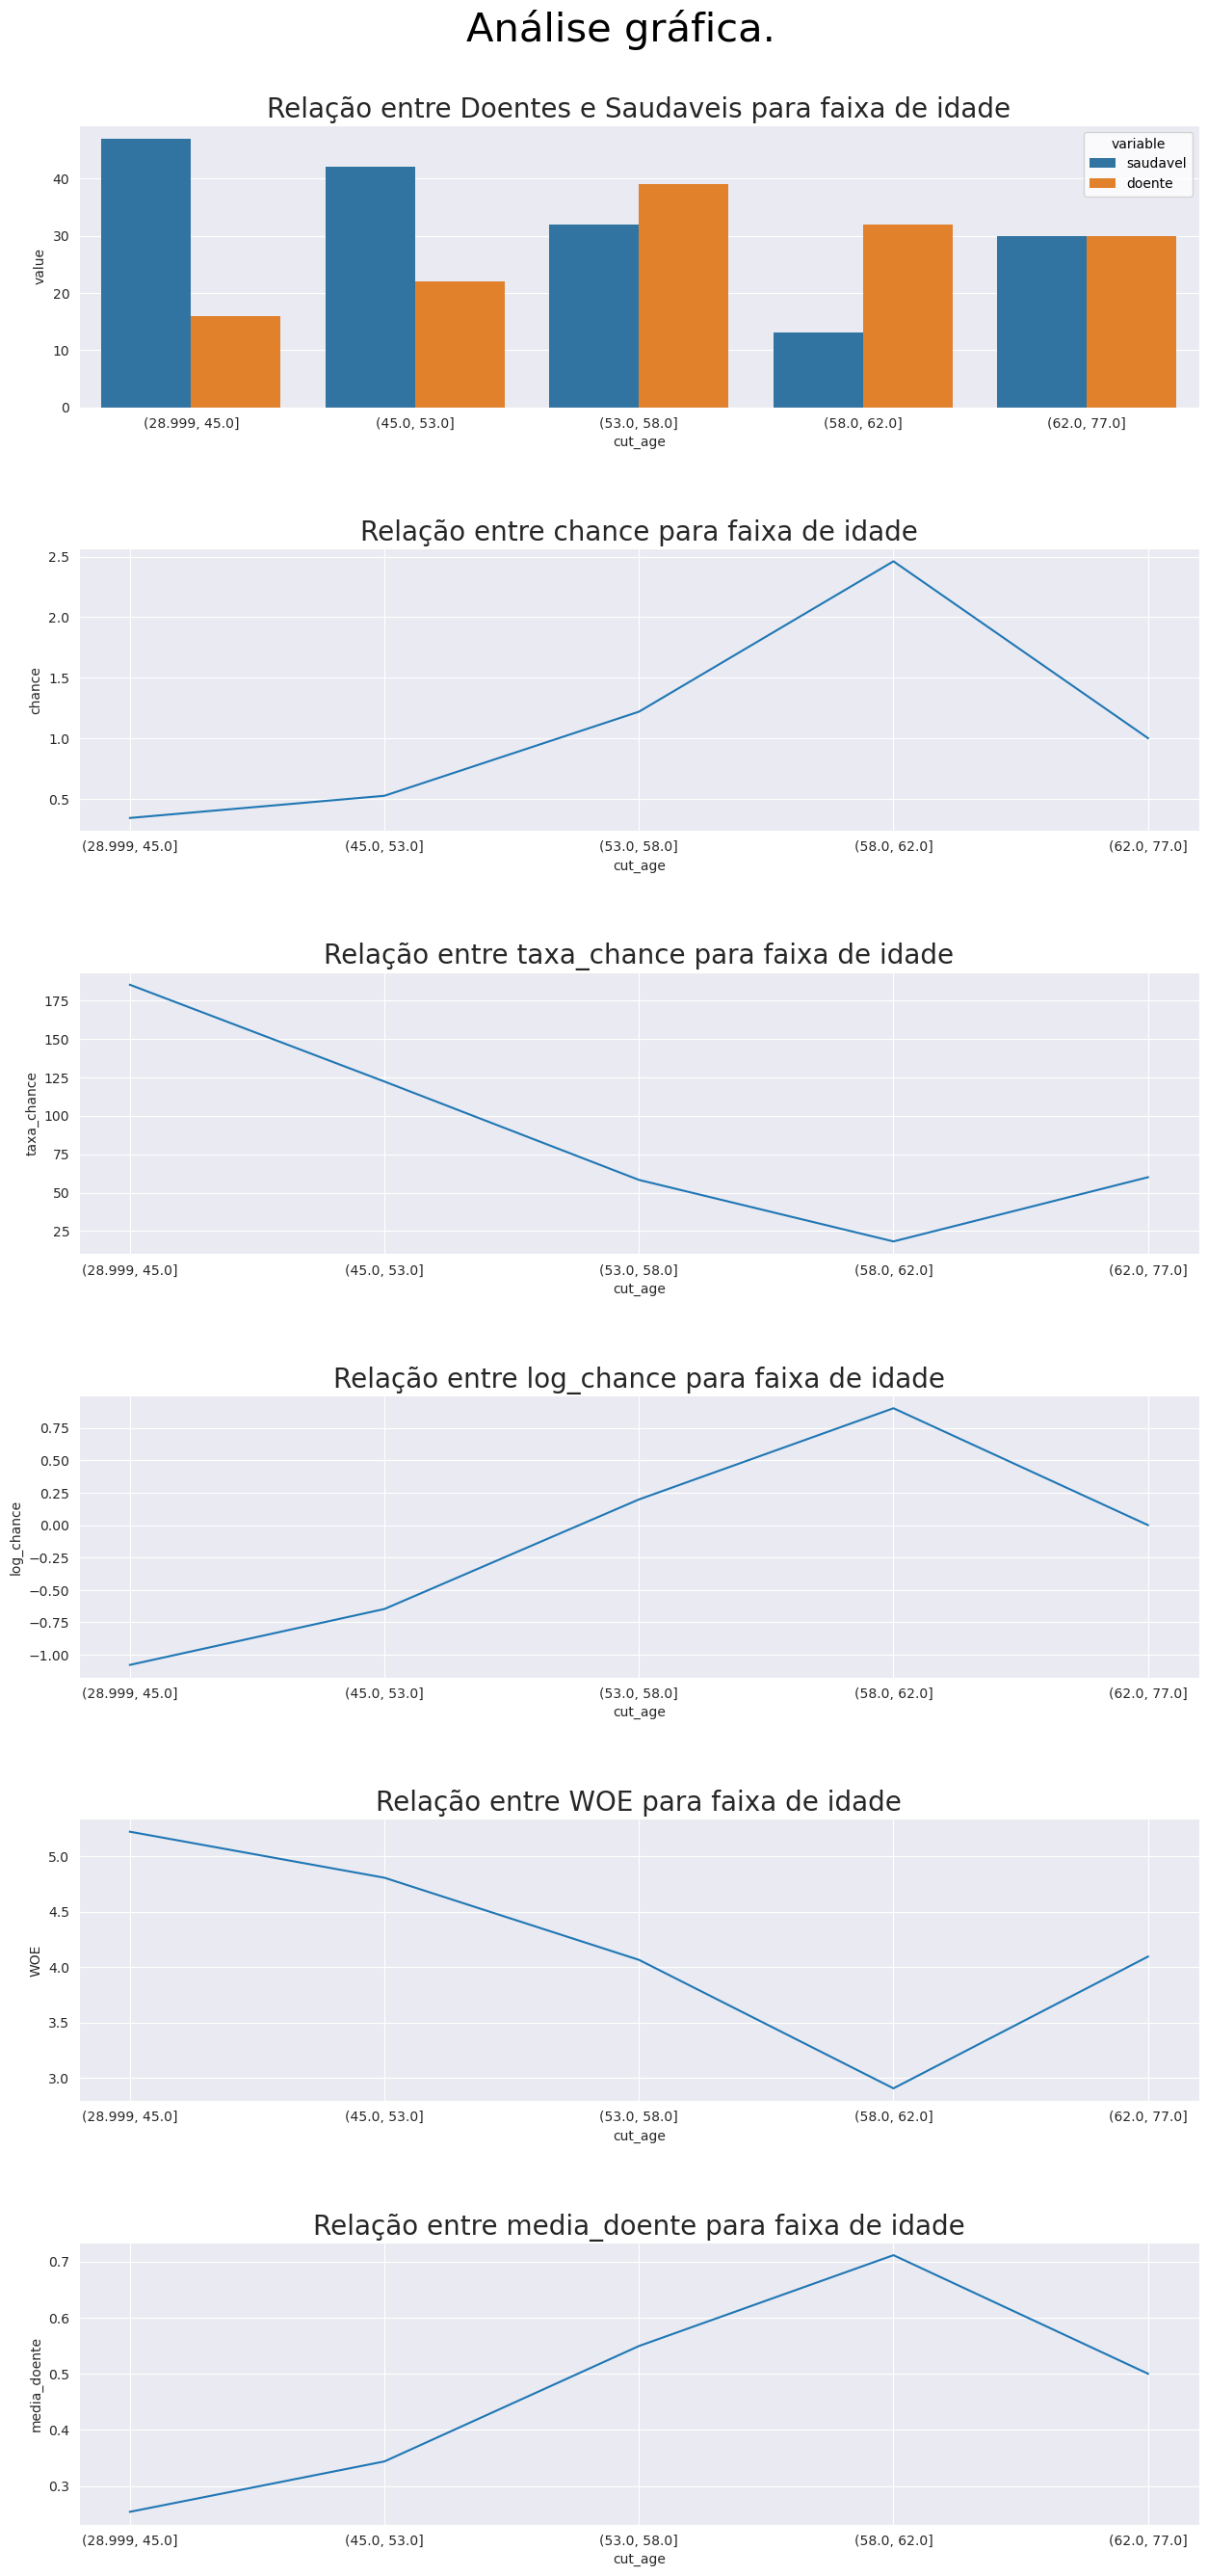

In [146]:
grafico_infos()